H1.6 K-nearest neighbor
============

Using dataset MNIST from sklearn

In [164]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

SID: 862057597 =>
pick the last 3 digits for classification sample (5, 7, 9)


In [165]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors

data = mnist.data
label = mnist.target
training_data = np.zeros(shape=(600, 784))
training_label = np.array([])
testing_data = np.zeros(shape=(600, 784))
training_data[0:200] = data[31597:31597+200]
training_data[200:400] = data[41971:41971+200]
training_data[400:600] = data[55330:55330+200]
training_label = np.append(training_label, label[31597:31597+200])
training_label = np.append(training_label, label[41971:41971+200])
training_label = np.append(training_label, label[55330:55330+200])
testing_data[0:200] = data[65166:65166 + 200]
testing_data[200:400] = data[67227:67227 + 200]
testing_data[400:600] = data[69173:69173 + 200]


In [166]:
n_neighbors = 1
clf = neighbors.KNeighborsClassifier(n_neighbors, 'distance', algorithm='brute')
clf.fit(training_data, training_label)
Z = clf.predict(testing_data[:200])
correct_count = 0
mis_classified_item = []
for i in range(len(Z)):
    if Z[i] == training_label[i]:
        correct_count += 1
    else:
        mis_classified_item.append(i)
print("accuracy = {0}".format(correct_count / len(Z)))

accuracy = 0.95


In [167]:
n_neighbors = 1
clf = neighbors.KNeighborsClassifier(n_neighbors, 'distance', algorithm='brute')
clf.fit(training_data, training_label)
Z = clf.predict(testing_data)
correct_count = 0
for i in range(len(Z)):
    if Z[i] == training_label[i]:
        correct_count += 1
print("accuracy = {0}".format(correct_count / len(Z)))

accuracy = 0.94


In [168]:
n_neighbors = 3
clf = neighbors.KNeighborsClassifier(n_neighbors, 'distance', algorithm='brute')
clf.fit(training_data, training_label)
Z = clf.predict(testing_data)
correct_count = 0
for i in range(len(Z)):
    if Z[i] == training_label[i]:
        correct_count += 1
print("accuracy = {0}".format(correct_count / len(Z)))

accuracy = 0.9433333333333334


In [169]:
def convert_data_to_img(data):
    img_list = []
    i = 0
    for row in range(28):
        temp = []
        for col in range(28):
            temp.append(data[i])
            i += 1
        img_list.append(temp)
    img = np.array(img_list)
    return img

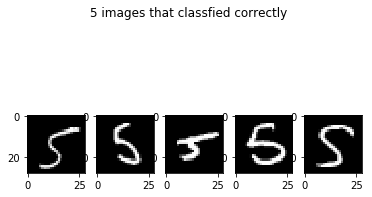

In [172]:
fig, p_arr = plt.subplots(1, 5)
fig.suptitle('5 images that classfied correctly')
for i in range(5):
    p_arr[i].imshow(convert_data_to_img(testing_data[i]))

plt.show()

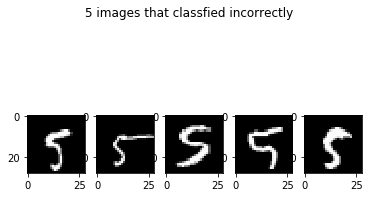

In [171]:
fig, p_arr = plt.subplots(1, 5)
fig.suptitle('5 images that classfied incorrectly')
for i in range(5):
    p_arr[i].imshow(convert_data_to_img(testing_data[mis_classified_item[i]]))
plt.show()